In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
from owi_data_2_pandas.io import API
import datetime
from pytz import utc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import dotenv
dotenv.load_dotenv()

from oma_clustering.oma_clustering_dbscan import ModeClusterer_DBSCAN
from oma_clustering.oma_clustering_hdbscan import ModeClusterer_HDBSCAN

In [4]:
from src.data.make_dataset import get_big_data

loc = 'nw2'
turbine = 'c02'

start = datetime.datetime(2022, 10, 1, tzinfo=utc)
end = datetime.datetime(2024, 1, 1, tzinfo=utc)

location = 'nw2c02'

#owi_api.query((start, end), location=location, metrics = metrics.metric).head()

# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
data_folder = os.path.join(package_folder, 'data')

data = pd.read_parquet(os.path.join(data_folder,'raw', loc, 'big_data', loc+turbine+'_big_data.parquet'))

In [5]:
mpe_data = data.filter(regex='mpe_')
def mpe_data_to_df(mpe_data, name_location, mode_direction):
    return pd.DataFrame.from_records(
            mpe_data['_'.join(['mpe', name_location, mode_direction])].explode().dropna().tolist()
        )\
            .set_index(
                mpe_data['_'.join(['mpe', name_location, mode_direction])].explode().dropna().index
            )

In [6]:
mpe_FA = mpe_data_to_df(mpe_data, 'NW2_C02', 'FA')
mpe_SS = mpe_data_to_df(mpe_data, 'NW2_C02', 'SS')

In [8]:
turbine_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'turbine_data.parquet'))

In [14]:
start1 = datetime.datetime(2023, 3, 22, tzinfo=datetime.timezone.utc)
end1 = datetime.datetime(2023, 3, 25, tzinfo=datetime.timezone.utc)
start2 = datetime.datetime(2023, 1, 7, tzinfo=datetime.timezone.utc)
end2 = datetime.datetime(2023, 1, 10, tzinfo=datetime.timezone.utc)

(0.2, 0.25)

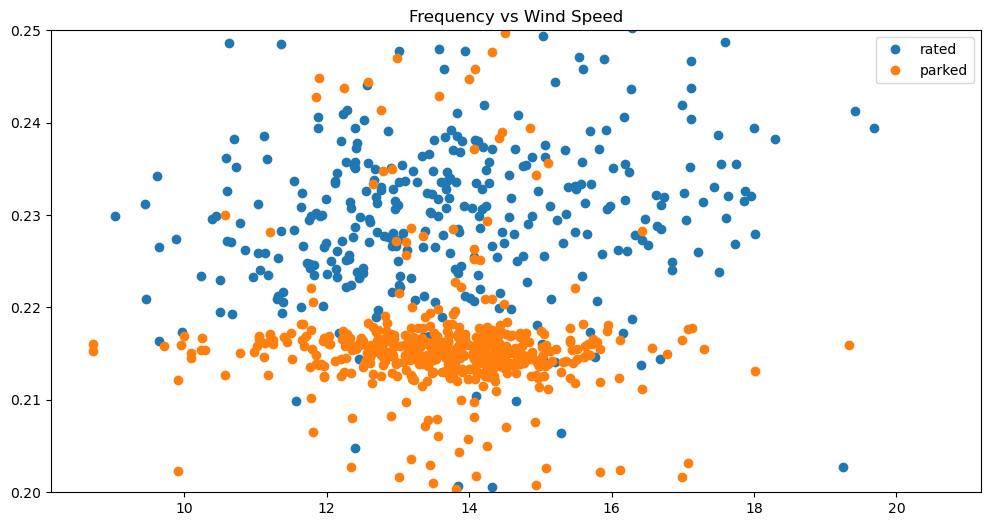

In [22]:
turbine_data
overlapping_indices = turbine_data.index.intersection(mpe_FA.index)
fa1_plot = mpe_FA.loc[overlapping_indices]
fa1_plot['wind_speed'] = turbine_data.loc[overlapping_indices]['mean_NW2_C02_windspeed']
fa1_plot1 = fa1_plot.loc[(fa1_plot.index >= start1) & (fa1_plot.index <= end1)]
fa1_plot2 = fa1_plot.loc[(fa1_plot.index >= start2) & (fa1_plot.index <= end2)]

plt.figure(figsize=(12, 6))

plt.plot(fa1_plot2['wind_speed'], fa1_plot2['mean_frequency'], 'o', alpha=1.0, label = 'rated')
plt.plot(fa1_plot1['wind_speed'], fa1_plot1['mean_frequency'], 'o', alpha=1.0, label = 'parked')
plt.legend()
plt.title('Frequency vs Wind Speed')
plt.ylim(0.2, 0.25)

In [29]:
turbine_data

,location,mean_NW2_C02_rpm,mean_NW2_C02_yaw,std_NW2_C02_pitch,mean_NW2_C02_pitch,mean_NW2_C02_power,std_NW2_C02_towerxacc,std_NW2_C02_toweryacc,std_NW2_C02_windspeed,mean_NW2_C02_towerxacc,...,min_NW2_C02_NAC_ACC_SS,rms_NW2_C02_NAC_ACC_FA,rms_NW2_C02_NAC_ACC_SS,std_NW2_C02_NAC_ACC_FA,std_NW2_C02_NAC_ACC_SS,mean_NW2_C02_NAC_ACC_FA,mean_NW2_C02_NAC_ACC_SS,rms1p_NW2_C02_NAC_ACC_Z,rms1p_NW2_C02_NAC_ACC_FA,rms1p_NW2_C02_NAC_ACC_SS
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-10-01 00:00:00+00:00,NW2C02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031085,0.012867,0.010128,0.012867,0.010128,0.0,0.0,NaN,NaN,NaN
2022-10-01 00:10:00+00:00,NW2C02,10.445,184.505,1.286229,13.345,9525.121,95.415619,97.464722,1.586,-13.932862,...,-0.039299,0.012175,0.010301,0.012175,0.010301,0.0,0.0,0.000463,0.004272,0.004826
2022-10-01 00:20:00+00:00,NW2C02,10.445,184.533,0.921634,14.352,9524.993,101.124157,101.845197,1.215,-4.225225,...,-0.042553,0.012015,0.010146,0.012015,0.010146,0.0,0.0,0.000445,0.004003,0.004124
2022-10-01 00:30:00+00:00,NW2C02,10.445,184.533,0.685358,13.848,9525.056,93.875489,96.540543,0.914,-12.766372,...,-0.034660,0.011474,0.009650,0.011474,0.009650,0.0,0.0,0.000494,0.004575,0.004302
2022-10-01 00:40:00+00:00,NW2C02,10.445,187.218,3.482077,9.372,9524.672,93.053587,93.762805,2.418,-9.416667,...,-0.038500,0.011134,0.009757,0.011134,0.009757,0.0,0.0,0.000417,0.003797,0.004092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30 23:20:00+00:00,NW2C02,7.162,11.638,2.486228,4.113,1519.808,NaN,NaN,0.891,NaN,...,-0.030072,0.011187,0.009656,0.011187,0.009656,0.0,0.0,0.000064,0.000600,0.000222
2023-11-30 23:30:00+00:00,NW2C02,6.864,8.813,3.017323,3.749,1225.920,NaN,NaN,0.660,NaN,...,-0.026958,0.008892,0.009605,0.008892,0.009605,0.0,0.0,0.000060,0.000565,0.000283
2023-11-30 23:40:00+00:00,NW2C02,7.162,10.939,0.506171,-0.839,1279.424,NaN,NaN,0.738,NaN,...,-0.034864,0.008255,0.009403,0.008255,0.009403,0.0,0.0,0.000053,0.000506,0.000275


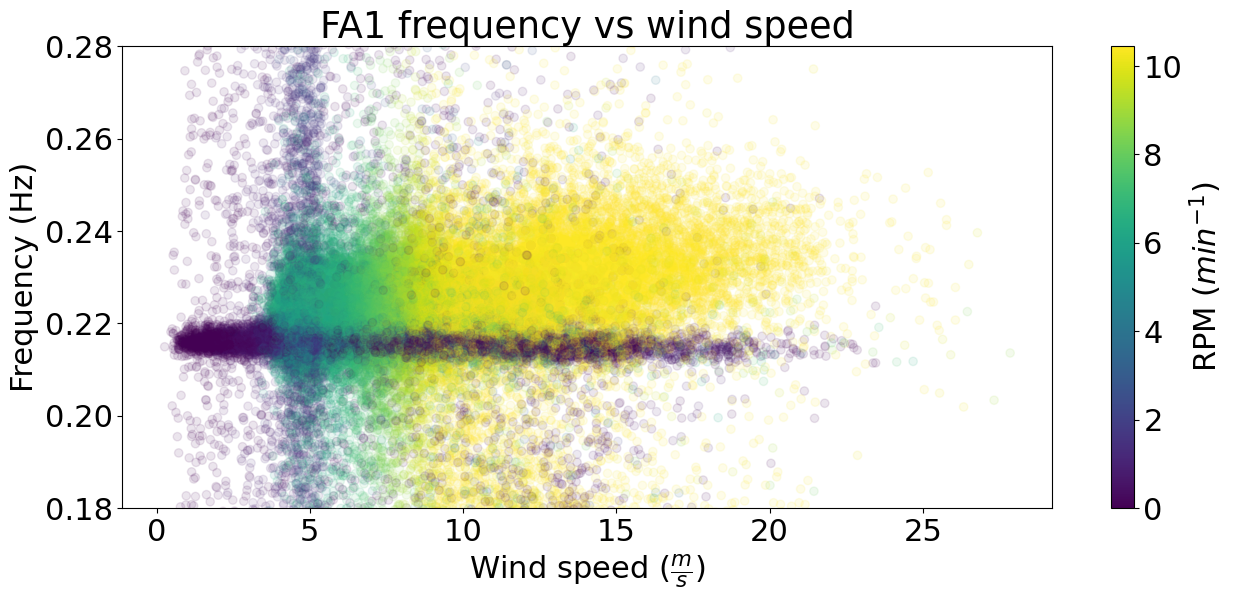

In [49]:
plt.rcParams.update({'font.size': 22})

turbine_data
overlapping_indices = turbine_data.index.intersection(mpe_FA.index)
fa1_plot = mpe_FA.loc[overlapping_indices]
fa1_plot['wind_speed'] = turbine_data.loc[overlapping_indices]['mean_NW2_C02_windspeed']
fa1_plot['RPM'] = turbine_data.loc[overlapping_indices]['mean_NW2_C02_rpm']
fa1_plot1 = fa1_plot.loc[(fa1_plot.index >= start1) & (fa1_plot.index <= end1)]
fa1_plot2 = fa1_plot.loc[(fa1_plot.index >= start2) & (fa1_plot.index <= end2)]

plt.figure(figsize=(15, 6))

scatter = plt.scatter(
    fa1_plot['wind_speed'], 
    fa1_plot['mean_frequency'], 
    c=fa1_plot['RPM'], 
    alpha=0.1, 
    cmap='viridis'  # You can choose any colormap here
)
colorbar = plt.colorbar(scatter, label=r'RPM ($min^{-1}$)')
colorbar.solids.set_alpha(1)  # Ensures color bar appears fully opaque

plt.xlabel(r'Wind speed ($\frac{m}{s}$)')
plt.ylabel('Frequency (Hz)')
plt.title('FA1 frequency vs wind speed')
plt.ylim(0.18, 0.28)
plt.show()

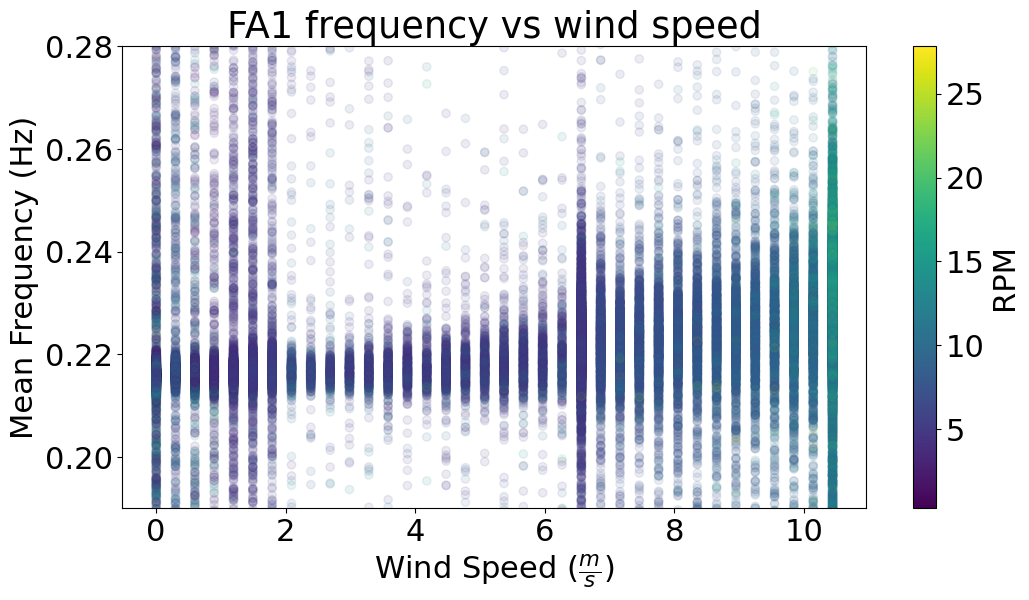

In [ ]:
plt.rcParams.update({'font.size': 22})

turbine_data
overlapping_indices = turbine_data.index.intersection(mpe_FA.index)
fa1_plot = mpe_FA.loc[overlapping_indices]
fa1_plot['wind_speed'] = turbine_data.loc[overlapping_indices]['mean_NW2_C02_windspeed']
fa1_plot['RPM'] = turbine_data.loc[overlapping_indices]['mean_NW2_C02_rpm']
fa1_plot1 = fa1_plot.loc[(fa1_plot.index >= start1) & (fa1_plot.index <= end1)]
fa1_plot2 = fa1_plot.loc[(fa1_plot.index >= start2) & (fa1_plot.index <= end2)]

plt.figure(figsize=(12, 6))

scatter = plt.scatter(
    fa1_plot['RPM'], 
    fa1_plot['mean_frequency'], 
    c=fa1_plot['wind_speed'], 
    alpha=0.1, 
    cmap='viridis'  # You can choose any colormap here
)
colorbar = plt.colorbar(scatter, label='wind speed')
colorbar.solids.set_alpha(1)  # Ensures color bar appears fully opaque

plt.xlabel(r'Wind Speed ($\frac{m}{s}$)')
plt.ylabel('Mean Frequency (Hz)')
plt.title('FA1 frequency vs wind speed')
plt.ylim(0.18, 0.28)
plt.show()

<Axes: xlabel='wind_speed', ylabel='mean_frequency'>

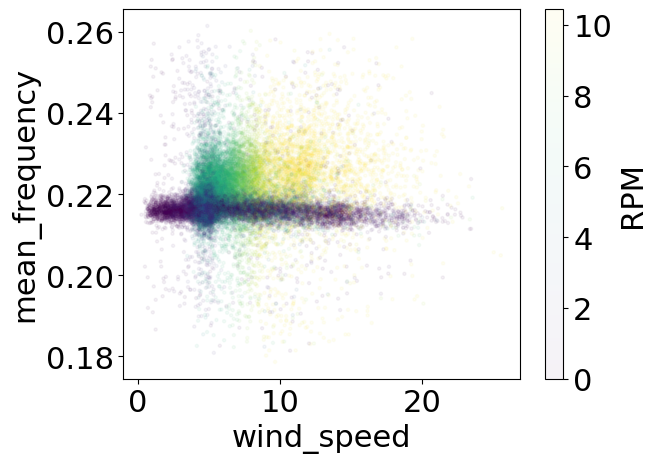

In [46]:
tracked_modes = pd.read_parquet(os.path.join(data_folder, 'interim','nw2', 'tracked_modes', 'dbscan_based','nw2c02_FA1_mode.parquet'))
mpe_ss_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_ss_data.parquet'))
mpe_fa_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_fa_data.parquet'))
harmonics_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'harmonics_data.parquet'))
turbine_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'turbine_data.parquet'))

turbine_data
overlapping_indices = turbine_data.index.intersection(tracked_modes.index)
fa1_plot = tracked_modes.loc[overlapping_indices]
fa1_plot['wind_speed'] = turbine_data.loc[overlapping_indices]['mean_NW2_C02_windspeed']
fa1_plot['RPM'] = turbine_data.loc[overlapping_indices]['mean_NW2_C02_rpm']
fa1_plot.plot.scatter(x='wind_speed', y='mean_frequency', s=5, alpha=0.05, c='RPM', cmap='viridis')

